In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn
seaborn.set(style='ticks')
#from gensim.scripts import glove2word2vec
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans

In [2]:
##################combining the text file###########################

In [3]:
import glob

In [4]:
csv_files = glob.glob('Health-Tweets/*.txt')
#print csv_files which is a list of filenames
#print(csv_files)


data = pd.DataFrame()
colnames = ['number', 'timestamp', 'tweet','filename']
#intialize empty list that we will append dataframes to
list_data = []

#write a for loop that will go through each of the file name through globbing and the end result will be the list of dataframes
for filename in csv_files:
    data = pd.read_csv(filename,sep="|",names=colnames,encoding="latin-1")
    data['filename']=filename.rstrip('.txt')
                               
    list_data.append(data)
#print list_data which is a list of dataframes
#list_data
 
ans=pd.concat(list_data,ignore_index=True)
ans


,number,timestamp,tweet,filename
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,Health-Tweets\bbchealth
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,Health-Tweets\bbchealth
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,Health-Tweets\bbchealth
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,Health-Tweets\bbchealth
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,Health-Tweets\bbchealth
5,585733482413891584,Wed Apr 08 09:18:39 +0000 2015,Review of case against NHS manager http://bbc....,Health-Tweets\bbchealth
6,585733481608646657,Wed Apr 08 09:18:39 +0000 2015,"VIDEO: 'All day is empty, what am I going to d...",Health-Tweets\bbchealth
7,585701601131765761,Wed Apr 08 07:11:58 +0000 2015,VIDEO: 'Overhaul needed' for end-of-life care ...,Health-Tweets\bbchealth
8,585620828110397440,Wed Apr 08 01:51:00 +0000 2015,Care for dying 'needs overhaul' http://bbc.in/...,Health-Tweets\bbchealth
9,585437294120677376,Tue Apr 07 13:41:42 +0000 2015,VIDEO: NHS: Labour and Tory key policies http:...,Health-Tweets\bbchealth


In [5]:
df=pd.DataFrame(ans)
df

,number,timestamp,tweet,filename
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,Health-Tweets\bbchealth
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,Health-Tweets\bbchealth
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,Health-Tweets\bbchealth
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,Health-Tweets\bbchealth
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,Health-Tweets\bbchealth
5,585733482413891584,Wed Apr 08 09:18:39 +0000 2015,Review of case against NHS manager http://bbc....,Health-Tweets\bbchealth
6,585733481608646657,Wed Apr 08 09:18:39 +0000 2015,"VIDEO: 'All day is empty, what am I going to d...",Health-Tweets\bbchealth
7,585701601131765761,Wed Apr 08 07:11:58 +0000 2015,VIDEO: 'Overhaul needed' for end-of-life care ...,Health-Tweets\bbchealth
8,585620828110397440,Wed Apr 08 01:51:00 +0000 2015,Care for dying 'needs overhaul' http://bbc.in/...,Health-Tweets\bbchealth
9,585437294120677376,Tue Apr 07 13:41:42 +0000 2015,VIDEO: NHS: Labour and Tory key policies http:...,Health-Tweets\bbchealth


In [ ]:
############### Checking the encoding issue############################333

In [ ]:
import fuzzywuzzy
from fuzzywuzzy import process
import chardet


In [ ]:
import glob
import os
 
#file_list = glob.glob(os.path.join(os.getcwd(), "Health-Tweets", "*.txt"))
 
#corpus = []
 
#for file_path in file_list:
with open("Health-Tweets/wsjhealth.txt",'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

In [ ]:
with open("../input/PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

In [ ]:
######################encoding done#################################

In [ ]:
####################dropping the unwanted columns#################

In [6]:
del df['number']
del df['timestamp']

In [ ]:
df['tweet'][300]

In [ ]:
df

In [ ]:
############################replace spl characters######################

In [7]:
df['tweet'] = df['tweet'].str.replace(r"[^a-zA-Z ]+", '').str.strip()


In [ ]:
#df['tweet'] = df['tweet'].str.replace('VIDEO', '', case=False)
#df['tweet'] = df['tweet'].str.replace('RT', '', case=False)

In [8]:
df['tweet'] = df['tweet'].str.replace('(?<!\S)(http\S+)(?!\S)', '', case=False)

In [9]:
df['tweet'] = df['tweet'].str.lstrip()

In [ ]:
######checking#####

In [ ]:
df['tweet'][900]

In [ ]:
######################### Removing stop words###########################

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [11]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [12]:
#########################counting the frequent words-***needs changes**********

In [13]:
from collections import Counter

In [14]:
c=Counter(" ".join(df["tweet"]).split()).most_common(10) 

In [15]:
c
#colnames=['commmon words','count']
count=pd.DataFrame(c)
count =count.rename(columns={0:'word', 1:'count'})
df
count

,word,count
0,RT,7965
1,Ebola,4149
2,The,3783
3,A,2821
4,health,2751
5,Health,2472
6,New,2026
7,US,1958
8,How,1942
9,says,1929


In [ ]:
#################plotting graph########################

In [ ]:
x=count["word"]
y=count["count"]
plt.title("USNewsheath")
plt.xticks(rotation=45)
plt.xlabel("CommonWords",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.bar(x,y)

In [ ]:
df.isna().sum()

In [ ]:
######################K-Means clustering############################

In [16]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

In [17]:
df

,tweet,filename
0,Breast cancer risk test devised,Health-Tweets\bbchealth
1,GP workload harming care BMA poll,Health-Tweets\bbchealth
2,Short peoples heart risk greater,Health-Tweets\bbchealth
3,New approach HIV promising,Health-Tweets\bbchealth
4,Coalition undermined NHS doctors,Health-Tweets\bbchealth
5,Review case NHS manager,Health-Tweets\bbchealth
6,VIDEO All day empty I going,Health-Tweets\bbchealth
7,VIDEO Overhaul needed endoflife care,Health-Tweets\bbchealth
8,Care dying needs overhaul,Health-Tweets\bbchealth
9,VIDEO NHS Labour Tory key policies,Health-Tweets\bbchealth


In [18]:
corpus = []
for i in df['tweet']:
    corpus.append(i)

In [19]:
corpus

['Breast cancer risk test devised',
 'GP workload harming care BMA poll',
 'Short peoples heart risk greater',
 'New approach HIV promising',
 'Coalition undermined NHS doctors',
 'Review case NHS manager',
 'VIDEO All day empty I going',
 'VIDEO Overhaul needed endoflife care',
 'Care dying needs overhaul',
 'VIDEO NHS Labour Tory key policies',
 'Have GP services got worse',
 'AampE waiting hits new worst level',
 'Parties row GP opening hours',
 'Why strenuous runs may bad',
 'VIDEO Health surcharge nonEU patients',
 'VIDEO Skin cancer spike holidays',
 'might die future outbreak',
 'Skin cancer linked holiday boom',
 'Public back tax rises fund NHS',
 'VIDEO Welcome designer asylum',
 'VIDEO Why less sex',
 'Five ideas transform NHS',
 'Personal cancer vaccines exciting',
 'Child heart surgery deaths halved',
 'VIDEO Miliband Cameron failed NHS',
 'Unsafe food growing global threat',
 'Health highlights',
 'Ambulance progress fast enough',
 'Childrens hospital builds sleep app',
 '

In [20]:
new = []
for i in df['filename']:
    new.append(i.split('/')[-1])
df['company'] = new

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

In [23]:
kmeans = KMeans(n_clusters=16)
labels = kmeans.fit_predict(X)

In [25]:
TSVD = TruncatedSVD(n_components=2)
result = TSVD.fit_transform(X)

In [27]:
_labels = np.unique(list(df['company']))

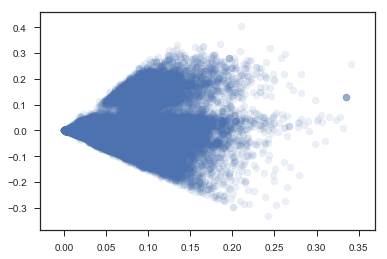

In [28]:
plt.scatter(result[:, 0], result[:, 1],alpha=0.1)
#words = list(model_2.wv.vocab)
plt.show()

In [29]:
res = pd.DataFrame(result)
res['labels'] = df['company']

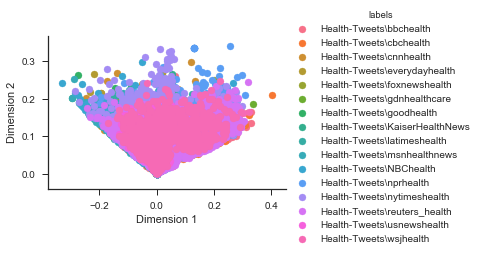

In [30]:
fg = seaborn.FacetGrid(data=res, hue='labels', aspect=1.5)
fg.map(plt.scatter, 1, 0).add_legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

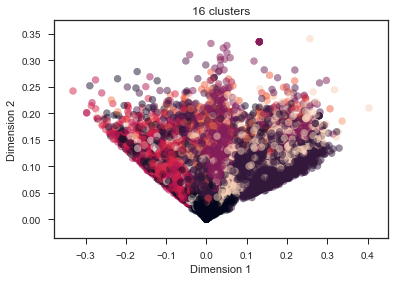

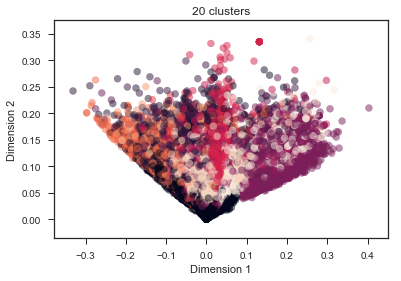

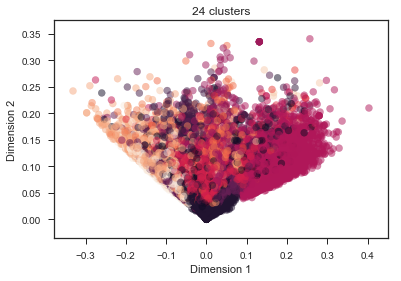

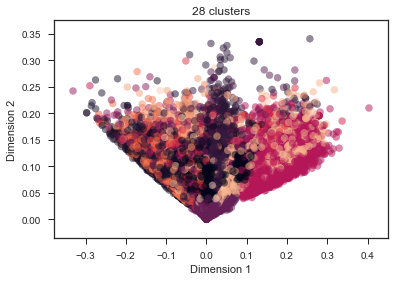

In [31]:
for i in range(16,32,4):
    
    kmeans = KMeans(n_clusters=i)
    K = kmeans.fit_predict(X)
    plt.scatter(result[:,1],result[:,0],c=K,alpha=0.5)
    plt.title(str(i)+' clusters')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

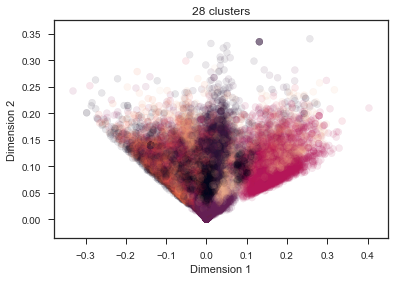

In [32]:
plt.scatter(result[:,1],result[:,0],c=K,alpha=0.1)
plt.title(str(i)+' clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
df.head()